# 1. Library Import

In [2]:
# system path config
# import os
# import sys
# sys.path.append('/nfs/users/yihao/datalake-vis/src')   # make this the src folder in project home
# from datalake_vis.vis_instance.opt_vis_instance import OptPerfVisInstance
# from datalake_vis.utils import plot_vis_plan

# general import
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict


# 2. Parameter Sepcification

In [3]:
# Specify some necessary parameters

tus_res_path = "data/santos/tus_results/results_k50_t6.pkl"         # table union search result path, please specify a pickle file
query_table_name = "mines_a.csv"           # the file name of the query table
query_path = "data/santos/query"           # path to the directory that contains queries
datalake_path = "data/santos/datalake"        # path to the directory that contains datalake
n = 10                     # the number of result tables


# load table union search
tus_res = pickle.load(open(tus_res_path, "rb"))
result_table_names = [x[0] for i, x in enumerate(tus_res[query_table_name]) if i < n]
result_table_paths = [f"{datalake_path}/{x[0]}" for i, x in enumerate(tus_res[query_table_name]) if i < n]
# orig_result_table_paths = [f"{orig_datalake_path}/{x[0]}" for i, x in enumerate(tus_res[query_table_name])]


                                                                      


# 3. Data Loading

In [4]:
def load_csv_files(file_list: List[str]) -> List[Tuple[str, pd.DataFrame]]:
    dataframes = []
    for file in file_list:
        df = pd.read_csv(file)
        dataframes.append(df)
    return dataframes


table_dfs = load_csv_files([f"{query_path}/{query_table_name}"] + result_table_paths)



## 4. Data Summary

In [5]:
def print_schemas(df_list: List[Tuple[str, pd.DataFrame]]):
    for i, (df, name) in enumerate(zip(df_list, [query_table_name] + result_table_names)):
        print(i, name, df.columns)

print_schemas(table_dfs)

# Feel free to print further information if needed


0 mines_a.csv Index(['Ã¯Â»Â¿FSCL_YR', 'MINC', 'MINE',
       'DepartmentNumber-NumÃÂ©ro-de-MinistÃÂ¨re', 'DEPT_EN_DESC', 'OBJ_CD',
       'OBJ_EN_NM', 'AGRG_PYMT_AMT'],
      dtype='object')
1 mines_a.csv Index(['Ã¯Â»Â¿FSCL_YR', 'MINC', 'MINE',
       'DepartmentNumber-NumÃÂ©ro-de-MinistÃÂ¨re', 'DEPT_EN_DESC', 'OBJ_CD',
       'OBJ_EN_NM', 'AGRG_PYMT_AMT'],
      dtype='object')
2 mines_2.csv Index(['ï»¿FSCL_YR', 'MINC', 'MINE', 'DepartmentNumber-NumÃ©ro-de-MinistÃ¨re',
       'DEPT_EN_DESC', 'OBJ_CD', 'OBJ_EN_NM', 'AGRG_PYMT_AMT'],
      dtype='object')
3 mines_4.csv Index(['ï»¿FSCL_YR', 'MINC', 'MINE', 'DepartmentNumber-NumÃ©ro-de-MinistÃ¨re',
       'DEPT_EN_DESC', 'OBJ_CD', 'OBJ_EN_NM', 'AGRG_PYMT_AMT'],
      dtype='object')
4 mines_3.csv Index(['ï»¿FSCL_YR', 'MINC', 'MINE', 'DepartmentNumber-NumÃ©ro-de-MinistÃ¨re',
       'DEPT_EN_DESC', 'OBJ_CD', 'OBJ_EN_NM', 'AGRG_PYMT_AMT'],
      dtype='object')
5 mines_0.csv Index(['ï»¿FSCL_YR', 'MINC', 'MINE', 'DepartmentNumber-NumÃ©ro-

# 5. Table Pre-processing and Selection

In [8]:
# enter the index of table you would like to explore
selected_1 = [0, 1, 2, 3, 4]
table_dfs_1 = [table_dfs[i] for i in selected_1]
result_table_names_1 = [result_table_names[i - 1] for i in selected_1 if i > 0]

selected_2 = [5, 6, 7, 8, 9, 10]
table_dfs_2 = [table_dfs[i] for i in selected_2]
result_table_names_2 = [result_table_names[i - 1] for i in selected_2 if i > 0]

# add any preprocessing for the table here



# 6. Perform Group-By and Calculate Aggregate

In [13]:
def prepare_dataframe_for_grouping(table_dfs: List[pd.DataFrame], matching_info: Tuple[str, List[Tuple[int, int]]], x_column: str, y_column: str) -> pd.DataFrame:
    x_col_idx, y_col_idx = table_dfs[0].columns.get_loc(x_column), table_dfs[0].columns.get_loc(y_column)
    matching = {t[0]: {p[0]: p[1] for p in t[1]} for t in matching_info}
    x_df = pd.concat([table_dfs[0][x_column]] + [table_dfs[i].iloc[:,matching[result_table_names[i-1]][x_col_idx]] for i, t in enumerate(table_dfs) if i > 0], axis=0)
    y_df = pd.concat([table_dfs[0][y_column]] + [table_dfs[i].iloc[:,matching[result_table_names[i-1]][y_col_idx]] for i, t in enumerate(table_dfs) if i > 0], axis=0)
    return pd.concat([x_df, y_df], axis=1)

def perform_group_by(df: pd.DataFrame, x_column: str, y_column: str, agg_func: str) -> pd.DataFrame:
    result = df.sort_values(x_column).groupby(x_column).agg({y_column: agg_func})
    return result
    
# specify the columns in the query table
x_column = "OBJ_CD"
y_column = "AGRG_PYMT_AMT"
agg_func = "mean"
group_df_1 = prepare_dataframe_for_grouping(table_dfs_1, tus_res[query_table_name], x_column, y_column)
grouped_result_1 = perform_group_by(group_df_1, x_column, y_column, agg_func)

group_df_2 = prepare_dataframe_for_grouping(table_dfs_2, tus_res[query_table_name], x_column, y_column)
grouped_result_2 = perform_group_by(group_df_2, x_column, y_column, agg_func)


# 7 Visualization of the Aggregate Result

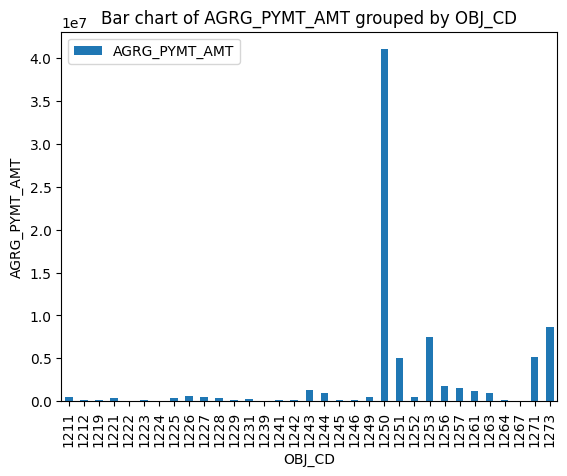

In [14]:
# Function to visualize the group-by result
def visualize_group_by_result(df: pd.DataFrame, x_column: str, y_column: str, chart_type: str = "bar"):
    if chart_type == "bar":
        df.plot(kind='bar', x=x_column, y=y_column)
    elif chart_type == "line":
        df.plot(kind='line', x=x_column, y=y_column)
    elif chart_type == "scatter":
        df.plot(kind='scatter', x=x_column, y=y_column)
    else:
        raise ValueError("Unsupported chart type")
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{chart_type.capitalize()} chart of {y_column} grouped by {x_column}")
    plt.show()

# Example usage
chart_type = "bar"  # Replace with desired chart type ('bar', 'line', 'scatter', etc.)
visualize_group_by_result(grouped_result_1.reset_index(), x_column, y_column, chart_type)

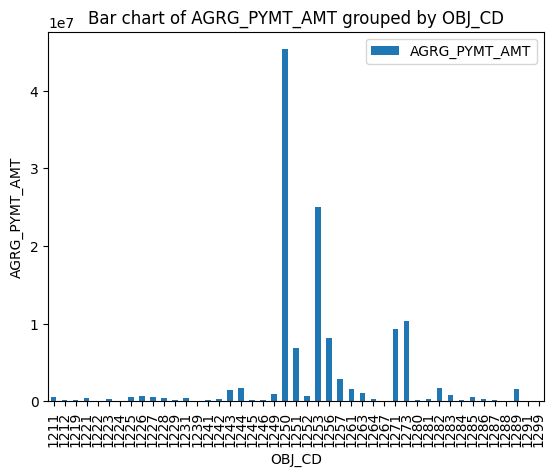

In [15]:
visualize_group_by_result(grouped_result_2.reset_index(), x_column, y_column, chart_type)



In [ ]:
# plot_vis_plan(top_k_plans[0])


In [3]:
# print(top_k_plans[0].plan_details())

/nfs/users/yihao/datalake-vis
